<a href="https://colab.research.google.com/github/leandrorodor/ALR-Machine_Learning_AS/blob/main/regressao_linear_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

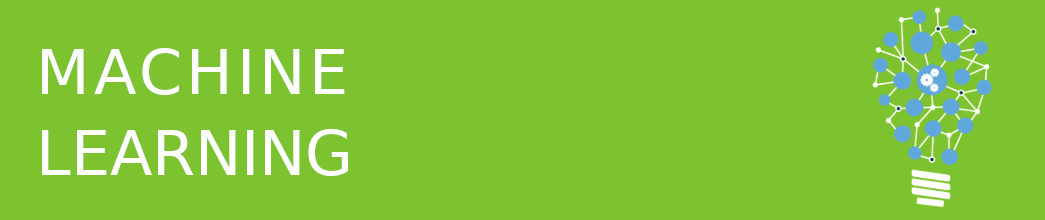

In [1]:
from IPython.display import Image
Image('/content/sample_data/banner_machine_learning.png')

# Regressão linear múltipla
A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Leitura dos dados

Download Dataset: [rlma.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/movies_multilinear_reg.csv)

In [ ]:
movies = pd.read_csv('/content/sample_data/rlma.csv')

In [ ]:
type(movies)

pandas.core.frame.DataFrame

## Visualização dos dados

In [ ]:
movies.head(10)

,movieId,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Bilheteria
0,1,Toy Story (1995),0,0,0,0,0,0,0,1,1,1,1,0,1,103.468310,11.048216,5623234.602
1,2,Jumanji (1995),0,0,0,0,0,0,0,1,0,0,1,0,1,112.337916,14.927678,5714951.757
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,1,0,0,0,0,116.245732,27.114597,9524339.124
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,0,1,0,0,1,0,120.317732,4.994242,6331568.779
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,110.023572,19.142246,6409617.277
5,6,Heat (1995),0,0,0,0,0,1,1,0,0,0,0,0,0,97.324845,9.977311,4956557.317
6,7,Sabrina (1995),0,0,0,0,1,0,0,0,1,0,0,0,0,88.978893,14.257461,4654565.066
7,8,Tom and Huck (1995),0,0,0,0,0,0,0,0,0,0,1,0,1,78.536011,8.871800,3950017.325
8,9,Sudden Death (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,104.934703,29.112800,6850971.551
9,10,GoldenEye (1995),0,0,0,0,0,1,0,0,0,0,0,0,1,105.899475,3.695241,5157865.850


## Verificação do tamanho do dataset

In [ ]:
movies.shape

(9125, 18)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [ ]:
movies[movies.columns[2:17]].describe().round(2)

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
count,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00
mean,0.05,0.09,0.06,0.10,0.17,0.19,0.12,0.07,0.36,0.05,0.06,0.48,0.12,109.83,16.60
std,0.23,0.28,0.24,0.29,0.38,0.39,0.33,0.26,0.48,0.22,0.24,0.50,0.33,20.04,12.52
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.82,3.44
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,96.15,6.19
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,109.71,12.05
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,123.46,24.62
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,185.35,50.00


## Box plot da variável dependente (y)

Text(0, 0.5, 'Ingressos')

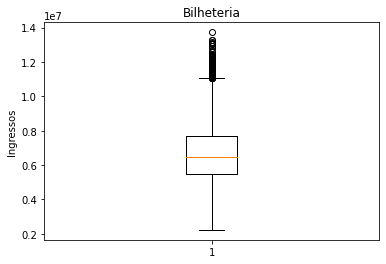

In [ ]:
plt.boxplot(x=movies['Bilheteria'])
plt.title("Bilheteria")
plt.ylabel("Ingressos")

## Investigando a variável dependente (y) segundo determinada característica

Text(0, 0.5, 'Ingressos')

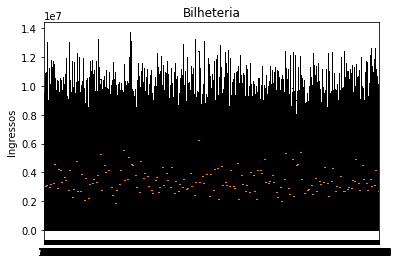

In [ ]:
plt.boxplot(x=movies[['Bilheteria', 'Duracao']])
plt.title("Bilheteria")
plt.ylabel("Ingressos")

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável dependente (y)

Text(0.5, 1.0, 'Distribuição de Frequências')

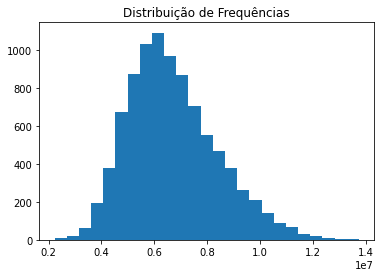

In [ ]:
plt.hist(x=movies['Bilheteria'], bins = 25)
plt.title('Distribuição de Frequências')

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
filmes_independente = movies[movies.columns[2:17]]

In [ ]:
type(filmes_independente)

pandas.core.frame.DataFrame

## Criando uma Series (pandas) para armazenar variável dependente (y)

In [ ]:
filmes_dependente = movies['Bilheteria']

In [ ]:
filmes_dependente

0       5.623235e+06
1       5.714952e+06
2       9.524339e+06
3       6.331569e+06
4       6.409617e+06
            ...     
9120    6.318999e+06
9121    5.300340e+06
9122    6.945211e+06
9123    6.459004e+06
9124    1.063624e+07
Name: Bilheteria, Length: 9125, dtype: float64

In [ ]:
type(filmes_dependente)

pandas.core.series.Series

## Criando os datasets de treino e de teste

In [ ]:
treino, teste, treino_bilheteria, teste_bilheteria = train_test_split(filmes_independente, filmes_dependente)

## Verificando os tamanhos dos arquivos gerados pela função train_test_split

In [ ]:
treino.head()

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
4172,0,0,1,0,0,1,1,0,0,0,0,1,0,90.851487,15.681750
452,0,0,0,0,1,0,0,1,0,0,0,1,0,103.530556,11.102722
7196,1,0,0,0,0,0,0,0,0,0,0,0,0,111.409929,7.215826
7262,0,0,0,0,0,1,1,0,0,0,0,1,0,112.594993,48.721088
9082,0,0,0,0,0,0,0,0,1,0,0,0,0,135.162843,7.996847


In [ ]:
treino.shape[0]

6843

In [ ]:
teste.shape[0]

2282

In [ ]:
treino.shape[0]+teste.shape[0]

9125

In [ ]:
treino_bilheteria.shape[0]

6843

In [ ]:
teste_bilheteria.shape[0]

2282

In [ ]:
treino_bilheteria.shape[0]+teste_bilheteria.shape[0]

9125

## Instanciando a classe LinearRegression()

In [ ]:
modelo = LinearRegression()
modelo.fit(treino,treino_bilheteria)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (treino e treino_bilheteria)

In [ ]:
modelo.fit(treino, treino_bilheteria)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

In [ ]:
print('R² = {}'.format(modelo.score(treino, treino_bilheteria).round(2)))

R² = 0.83


## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TESTE

In [ ]:
print('R² = {}'.format(modelo.score(teste, teste_bilheteria).round(2)))

R² = 0.83


## Gerando previsões para os dados de TESTE (teste) utilizando o método predict() do objeto "modelo"

In [ ]:
previsto_bilheteria = modelo.predict(teste)
previsto_bilheteria

array([6055980.89976928, 6281265.6687731 , 3258174.08062191, ...,
       7188053.3149619 , 5724064.23944871, 6638442.35374784])

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [ ]:
print('R² = {}'.format(metrics.r2_score(teste_bilheteria, previsto_bilheteria).round(2)))

R² = 0.83


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [ ]:
entrada = teste[0:1]
entrada

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
8528,1,0,0,0,0,0,0,0,0,0,0,0,0,128.27385,30.468686


## Gerando previsão pontual

In [ ]:
modelo.predict(entrada)[0]

8941978.589691874

## Criando um simulador simples

In [ ]:
Documentary=0
SciFi=0
Mystery=0
Horror=0
Romance=1
Thriller=0
Crime=0
Fantasy=0
Comedy=0
Animation=0
Children=0
Drama=0
Adventure=0
Duracao=86.730539
Investimento=29.579279
entrada=[[Documentary, SciFi, Mystery, Horror, Romance, Thriller, Crime, Fantasy, Comedy, Animation, Children, Drama, Adventure, Duracao, Investimento]]

print('{0:.2f} ingressos (Bilheteria)'.format(modelo.predict(entrada)[0]))

6961809.99 ingressos (Bilheteria)


#### Exemplo
#### 1,Toy Story (1995),0,0,0,0,0,0,0,1,1,1,1,0,1,103.4683096,11.04821649,5623234.602

In [ ]:
previsto = modelo.predict([[0,0,0,0,0,0,0,1,1,1,1,0,1,103.4683096,11.04821649]])
previsto

array([5832751.44049112])

# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo
O intercepto representa o efeito médio em $Y$ (Bilheteria) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o intercepto representa o efeito médio em $Y$ (Bilheteria de Cerveja) quando todas as variáveis independentes são iguais a zero.

In [ ]:
modelo.intercept_

9132.31538273301

In [ ]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão
Os coeficientes de regressão $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como coeficientes parciais de regressão ou coeficientes parciais angulares. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Bilheteria), por unidade de variação em $X_2$, mantendo-se os valores de $X_3$ e $X_4$ ($Xn$) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.

In [ ]:
modelo.coef_

array([ 46117.49648238,  36388.80468513,  -2869.12678201,  -2946.40308118,
        49860.05896982,  31279.32853746,   6315.66343483,  42687.90932374,
         8290.56787854,  13469.53171683,  -4956.1762187 ,   8320.19025925,
       -56742.81746258,  45623.03536987,  99593.60973107])

In [ ]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [ ]:
filmes_independente.columns

Index(['Documentary', 'Sci-Fi', 'Mystery', 'Horror', 'Romance', 'Thriller',
       'Crime', 'Fantasy', 'Comedy', 'Animation', 'Children', 'Drama',
       'Adventure', 'Duracao', 'Investimento'],
      dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [ ]:
index = ['Intercepto', 'Documentary', 'Sci-Fi', 'Mystery', 'Horror', 'Romance', 'Thriller',
       'Crime', 'Fantasy', 'Comedy', 'Animation', 'Children', 'Drama',
       'Adventure', 'Duracao', 'Investimento']

## Criando um DataFrame para armazenar os coeficientes do modelo

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9132.315383
Documentary,46117.496482
Sci-Fi,36388.804685
Mystery,-2869.126782
Horror,-2946.403081
Romance,49860.058970
Thriller,31279.328537
Crime,6315.663435
Fantasy,42687.909324
Comedy,8290.567879


## Interpretação dos Coeficientes Estimados
Intercepto → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4 ...Xn =0 $) o efeito médio na Bilheteria seria de 40379.948792 ingressos.

In [ ]:
index

['Intercepto',
 'Documentary',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Romance',
 'Thriller',
 'Crime',
 'Fantasy',
 'Comedy',
 'Animation',
 'Children',
 'Drama',
 'Adventure',
 'Duracao',
 'Investimento']

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [ ]:
previsto_bilheteria = modelo.predict(treino)
previsto_bilheteria

array([5758901.04411806, 5939138.85808484, 5856759.08872799, ...,
       5706802.72913023, 6507346.33041969, 5350932.73800418])

## Gráfico de dispersão entre valor estimado e valor real

Text(0, 0.5, 'Bilheteria (Pessoas)')

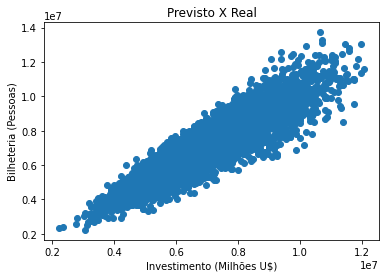

In [ ]:
plt.scatter(x=previsto_bilheteria, y=treino_bilheteria)
plt.title('Previsto X Real')
plt.xlabel('Investimento (Milhões U$)')
plt.ylabel('Bilheteria (Pessoas)')

## Obtendo os resíduos

In [ ]:
len(previsto_bilheteria)

6843

In [ ]:
len(treino_bilheteria)

6843

In [ ]:
residuo = treino_bilheteria - previsto_bilheteria
residuo

4172   -1.125461e+02
452    -6.541043e+05
7196    1.047897e+05
7262    1.131135e+05
9082   -3.833791e+05
            ...     
8084    1.660040e+06
1525   -4.975857e+05
4014    4.484252e+05
6503   -5.018828e+05
1231    7.617108e+05
Name: Bilheteria, Length: 6843, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos
Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

Text(0, 0.5, 'Bilheteria (Ingressos) - Real')

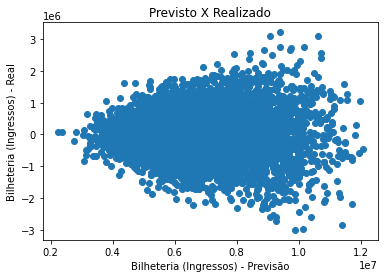

In [ ]:
plt.scatter(x=previsto_bilheteria, y=residuo)
plt.title('Previsto X Realizado')
plt.xlabel('Bilheteria (Ingressos) - Previsão')
plt.ylabel('Bilheteria (Ingressos) - Real')

## Utilizando os resíduos ao quadrado

Text(0, 0.5, 'Resíduos²')

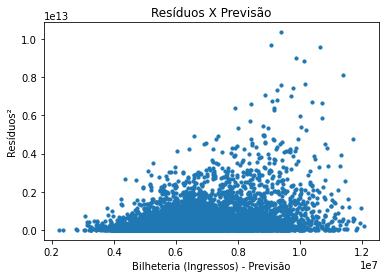

In [ ]:
plt.scatter(x=previsto_bilheteria, y=residuo**2, s=10)
plt.title('Resíduos X Previsão')
plt.xlabel('Bilheteria (Ingressos) - Previsão')
plt.ylabel('Resíduos²')

## Plotando a distribuição de frequências dos resíduos

Text(0.5, 0, 'Ingressos')

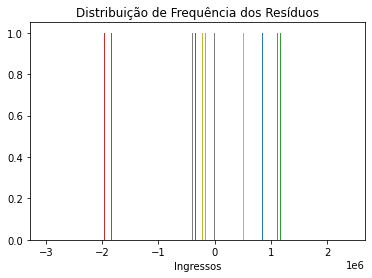

In [ ]:
plt.hist(residuo, bins=30)
plt.title('Distribuição de Frequência dos Resíduos')
plt.xlabel('Ingressos')


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Gerando previsões para os dados de TESTE utilizando o método *predict()* do objetos "modelo"

In [ ]:
previsto_bilheteria_teste = modelo.predict(teste)
previsto_bilheteria_teste

array([8941978.58969187, 7902794.68702349, 5963090.03820548, ...,
       6289006.70057734, 5692791.19901273, 6311981.60984392])

In [ ]:
previsto_bilheteria_teste

array([8941978.58969187, 7902794.68702349, 5963090.03820548, ...,
       6289006.70057734, 5692791.19901273, 6311981.60984392])

## Obtendo métricas para o modelo

In [ ]:
EQM_2 = metrics.mean_squared_error(teste_bilheteria, previsto_bilheteria_teste)
REQM_2 = np.sqrt(metrics.mean_squared_error(teste_bilheteria, previsto_bilheteria_teste))
R2_2 = metrics.r2_score(teste_bilheteria, previsto_bilheteria_teste)


pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,4.840697e+11
REQM,6.957512e+05
R²,8.271598e-01


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Gerando previsão pontual (Zootopia)
```
movieId,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Bilheteria
9999999,Zootopia,0,0,0,0,0,0,0,1,1,1,1,0,1,110,27.74456356,?????
```

In [ ]:
zootopia = [0,0,0,0,0,0,0,1,1,1,1,0,1,110,27.74456356]
modelo.predict([zootopia])

array([7793596.45665949])

## Salvando o modelo estimado

In [ ]:
import pickle

In [ ]:
output = open('modelo_bilheteria', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_bilheteria','rb')
lm_new = pickle.load(modelo)
modelo.close()

Documentary=0
SciFi=0
Mystery=0
Horror=0
Romance=1
Thriller=0
Crime=0
Fantasy=0
Comedy=0
Animation=0
Children=0
Drama=0
Adventure=0
Duracao=86.730539
Investimento=29.579279

entrada=[[Documentary, SciFi, Mystery, Horror, Romance, Thriller, Crime, Fantasy, Comedy, Animation, Children, Drama, Adventure, Duracao, Investimento]]

print('{0:.2f} ingressos'.format(lm_new.predict(entrada)[0]))
```

# <font color='red' style='font-size: 30px;'>Alterando tamanho dos dados</font>
<hr style='border: 2px solid red;'>

## Split dos dados com test_size=0.1

In [ ]:
treino_2, teste_2, treino_bilheteria_2, teste_bilheteria_2 = train_test_split(filmes_independente, filmes_dependente, test_size=0.1)

In [ ]:
modelo_2 = LinearRegression()
modelo_2.fit(treino_2,treino_bilheteria_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
modelo_2.score(treino_2, treino_bilheteria_2).round(2)

0.83

In [ ]:
modelo_2.score(teste_2, teste_bilheteria_2).round(2)

0.83

In [ ]:
len(treino_2),len(teste_2),len(treino_bilheteria_2),len(teste_bilheteria_2)

(8212, 913, 8212, 913)

In [ ]:
type(treino_2),type(teste_2),type(treino_bilheteria_2),type(teste_bilheteria_2)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [ ]:
previsto_bilheteria_2 = modelo_2.predict(teste_2)
len(previsto_bilheteria_2)

913

In [ ]:
type(previsto_bilheteria_2)

numpy.ndarray

In [ ]:
print('R² = {}'.format(metrics.r2_score(teste_bilheteria_2, previsto_bilheteria_2).round(2)))

R² = 0.83


In [ ]:
zootopia = [0,0,0,0,0,0,0,1,1,1,1,0,1,110,27.74456356]
modelo_2.predict([zootopia])

array([7770649.67831892])

In [ ]:
planeta_macaco = [0,1,0,0,0,0,0,0,0,0,0,0,0,150,5]
modelo_2.predict([planeta_macaco])

array([7366486.46391375])